In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import dates


from matplotlib import pyplot as plt
plt.style.use('ggplot')

In [2]:
!wget https://covid.ourworldindata.org/data/ecdc/full_data.csv -O data/full_data.csv

--2020-03-20 12:48:20--  https://covid.ourworldindata.org/data/ecdc/full_data.csv
Resolving covid.ourworldindata.org... 104.248.78.23
Connecting to covid.ourworldindata.org|104.248.78.23|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 170224 (166K) [text/csv]
Saving to: ‘data/full_data.csv’

data/full_data.csv  100%[===================>] 166.23K  --.-KB/s    in 0.08s   

2020-03-20 12:48:21 (2.00 MB/s) - ‘data/full_data.csv’ saved [170224/170224]



In [3]:
df = pd.read_csv("data/full_data.csv")


# pd.to_datetime(pd.Series(['05/23/2005']), format="%m/%d/%Y")


df["date"] = pd.to_datetime(df["date"], format="%Y-%m-%d")

# # Filling NaN with 0.
# columns_with_numbers = ['new_cases', "new_deaths", "total_cases", "total_deaths"]
# for column in columns_with_numbers:
#     df[column] = df[column].fillna(0)
df

,date,location,new_cases,new_deaths,total_cases,total_deaths
0,2019-12-31,Afghanistan,0,0,0,0
1,2020-01-01,Afghanistan,0,0,0,0
2,2020-01-02,Afghanistan,0,0,0,0
3,2020-01-03,Afghanistan,0,0,0,0
4,2020-01-04,Afghanistan,0,0,0,0
...,...,...,...,...,...,...
5915,2020-03-18,World,14750,770,194909,7873
5916,2020-03-19,World,18345,970,213254,8843
5917,2020-03-20,World,29222,1042,242476,9885
5918,2020-03-19,Zambia,2,0,2,0


In [13]:
def plot_countrywise_daily(data, country="Turkey", case_type="total_cases"):
    # Remove all the zeros if the case type starting with "total"
    plt.figure(figsize=(20,8))
    country = data[data["location"] == country]
    ax = sns.scatterplot("date", case_type, data=country)
    ax.set(xticks=country.date.values)
    ax.xaxis.set_major_formatter(dates.DateFormatter("%d-%m-%Y"))
    ax.set(xlim=(country["date"].iloc[0], country["date"].iloc[-1])) 
    plt.setp(ax.get_xticklabels(), rotation=45)
    plt.show()
    return country

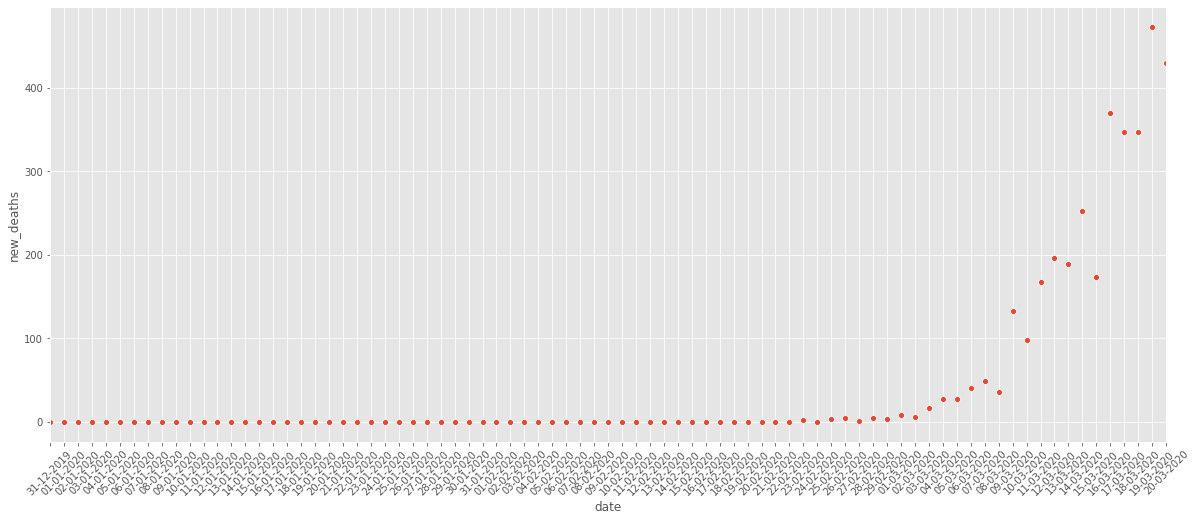

In [22]:
country="Italy"
column = "new_deaths"
country_df = plot_countrywise_daily(df, country=country, case_type=column)
# filtered_country_df = country_df[country_df[column] != 0]
# plot_countrywise_daily(filtered_country_df, country=country, case_type=column)